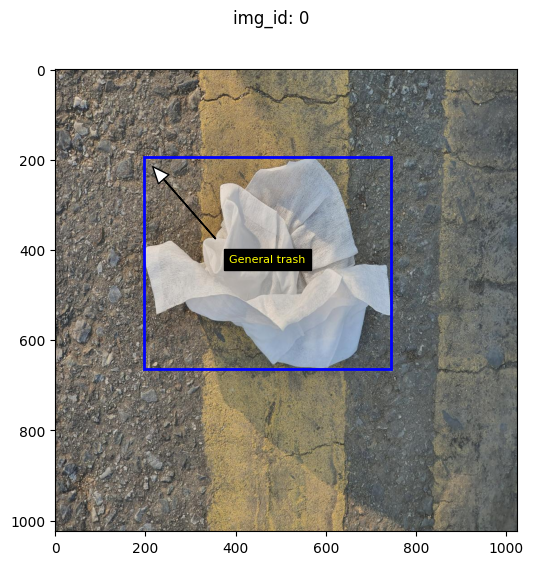

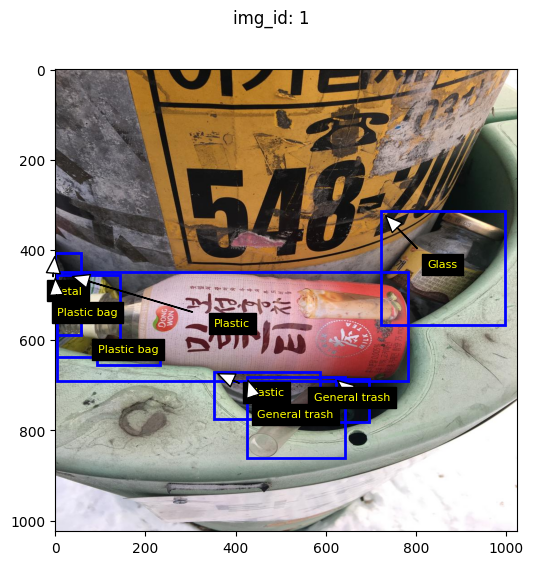

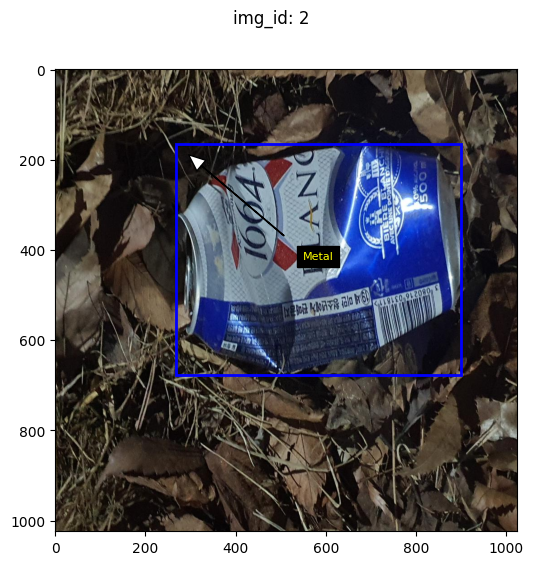

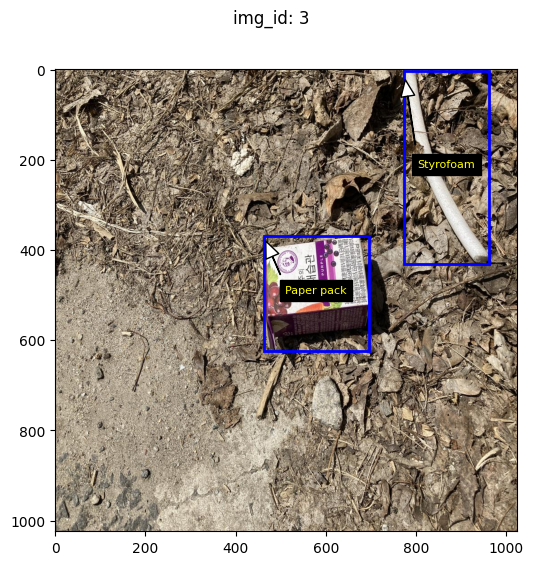

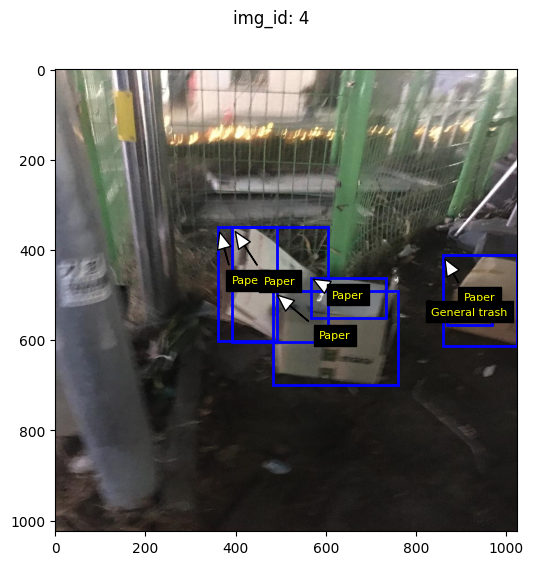

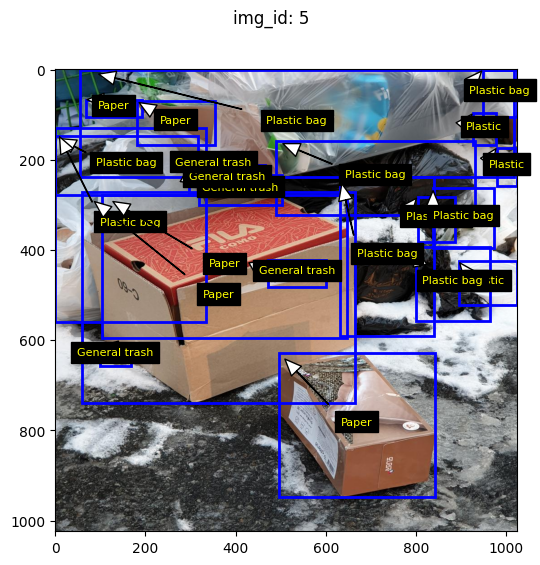

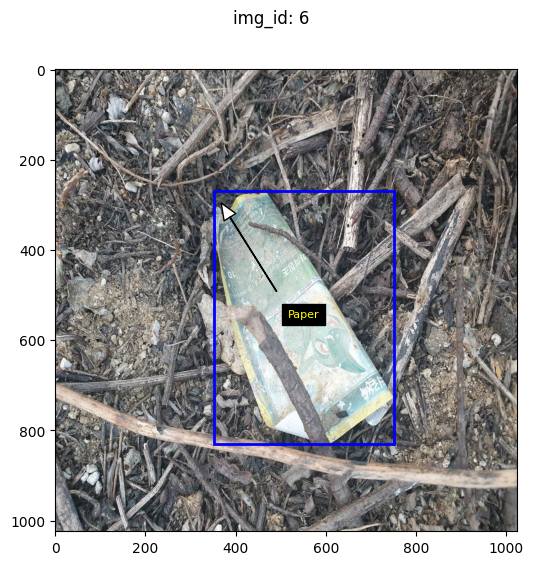

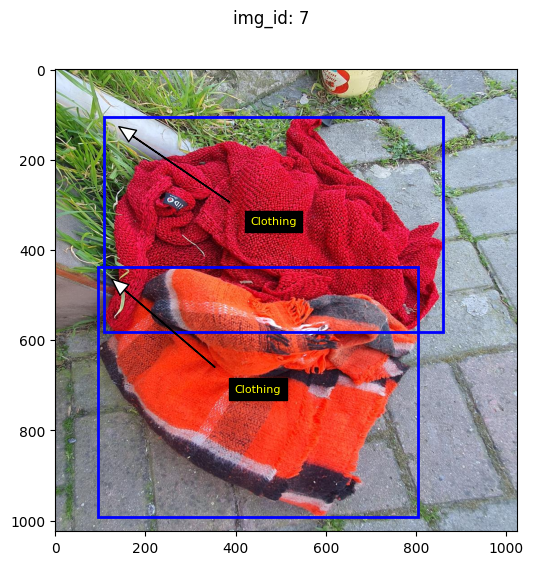

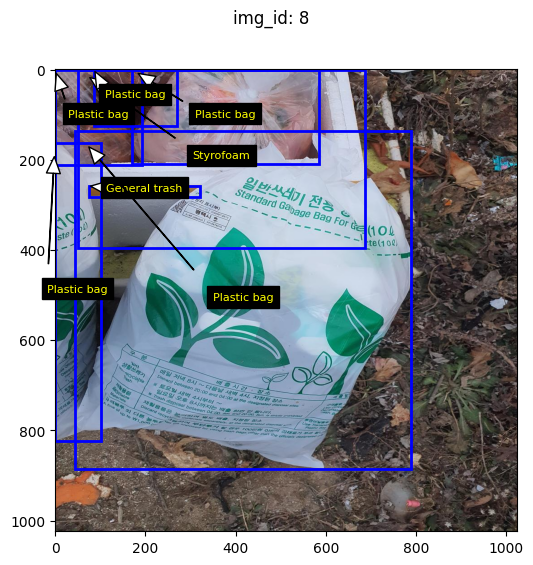

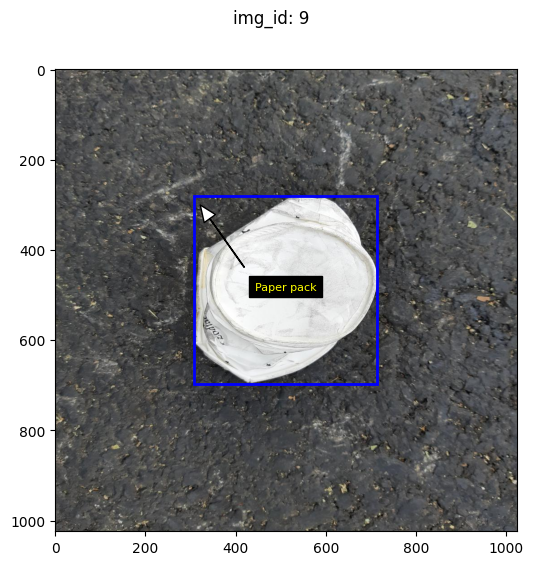

In [51]:
import torch
import matplotlib.pyplot as plt

import pandas as pd # pandas 모듈 로드
import json  # json 모듈 로드

json_file_path="/opt/ml/dataset/train.json" # 파일로드

with open(json_file_path,'r') as j:
    contents=json.loads(j.read())  # open : r - 읽기모드, w-쓰기모드, a-추가모드  
contents.keys()
contents['annotations'][0]['image_id'] # id
contents['annotations'][0]['bbox'] # bbox

def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (top-left x, top-left y, bottom-right x,
    # bottom-right y) format to matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2], height=bbox[3],
        fill=False, edgecolor=color, linewidth=2)
    
#importing the Image class from PIL package
from PIL import Image
label_name = ["General trash", "Paper", "Paper pack", "Metal", 
              "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
data_dir = '/opt/ml/dataset/train/'
# /opt/ml/dataset/train/0000.jpg
n=0
for i in range(10):
    #read the image, creating an object
    img_no = str(i).zfill(4)
    img = Image.open(f"{data_dir}{img_no}.jpg")
    fig, axes = plt.subplots(1,1,figsize=(12, 6))
    fig.suptitle(f"img_id: {i}")
    fig = plt.imshow(img)
    while contents['annotations'][n]['image_id']==i:
        bbox = contents['annotations'][n]['bbox']
        
        fig.axes.add_patch(bbox_to_rect(bbox,'blue'))
        plt.annotate(label_name[contents['annotations'][n]['category_id']], xy=(bbox[0], bbox[1]), xytext=(bbox[0]+int(bbox[2]*0.5),bbox[1]+int(bbox[3]*0.5)),
            fontsize=8, ha='center', color='yellow',backgroundcolor='black', arrowprops=dict(facecolor='white', width=0.3, shrink=0.1, headwidth=10))
        n+=1
